<a href="https://colab.research.google.com/github/SeanMin00/DS_Bootcamp_NYU/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

```
import pandas as pd

import matplotlib.pyplot as plt

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

- ---- Write your code below this after running above above code-----------

```







In [ ]:
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['Day'] = df['hour_beginning'].dt.day_name()
df.head()

<ipython-input-18-5b80e5bbc80c>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Day
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday


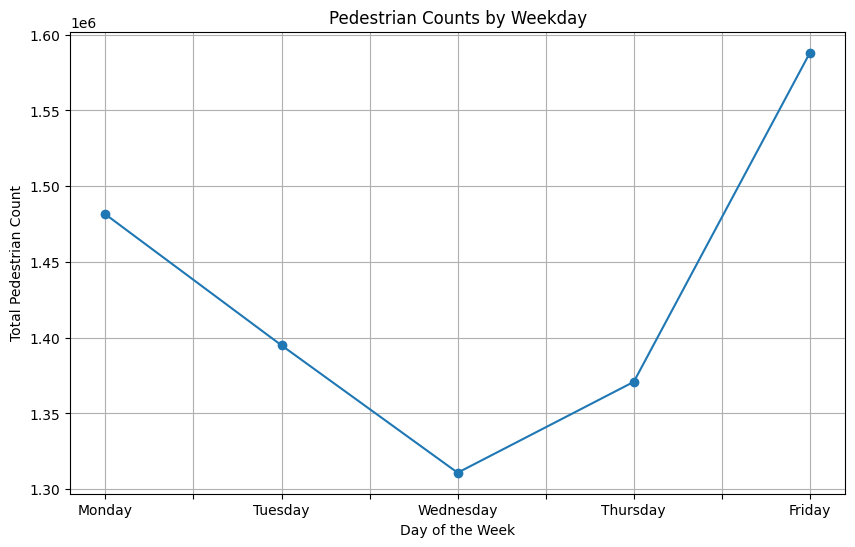

In [ ]:
# Filter data for weekdays (Monday to Friday)
weekdays = df[df['Day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Group by day of the week and calculate total pedestrian counts
weekday_counts = weekdays.groupby('Day')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plot pedestrian counts for each day of the week
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title("Pedestrian Counts by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.grid(True)
plt.show()


2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

- This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical datapoints, nonetheless this was given as a question to help you understand the concept better.

<ipython-input-20-242cb631f56c>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
<ipython-input-20-242cb631f56c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['weather_summary'] = df_2019['weather_summary'].fillna('Unknown')


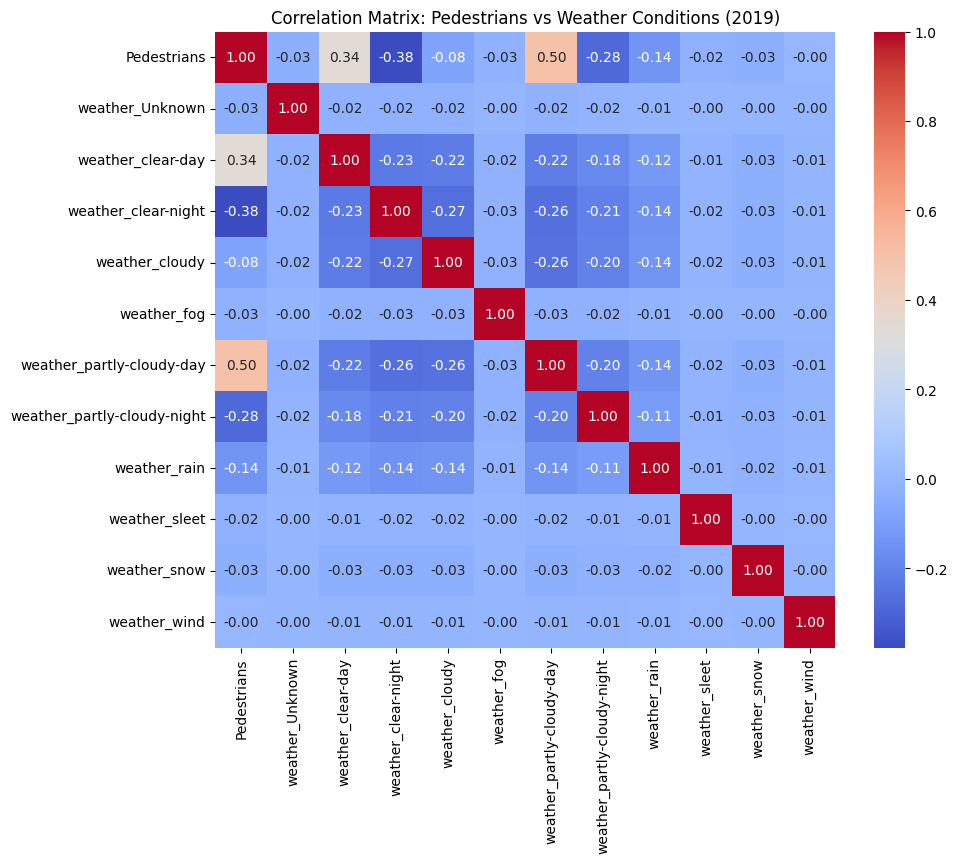

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['Day'] = df['hour_beginning'].dt.day_name()

df_2019 = df[df['hour_beginning'].dt.year == 2019]

df_2019['weather_summary'] = df_2019['weather_summary'].fillna('Unknown')

encoded_weather = pd.get_dummies(df_2019['weather_summary'], prefix='weather')

df_encoded = pd.concat([df_2019[['Pedestrians']], encoded_weather], axis=1)

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix: Pedestrians vs Weather Conditions (2019)")
plt.show()


3. Implement a custom function to categorize time of day into morning,

afternoon, evening, and night, and create a new column in the

DataFrame to store these categories. Use this new column to analyze

pedestrian activity patterns throughout the day.

- Students can also show plots analyzing activity.

<ipython-input-22-078583edeb6b>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


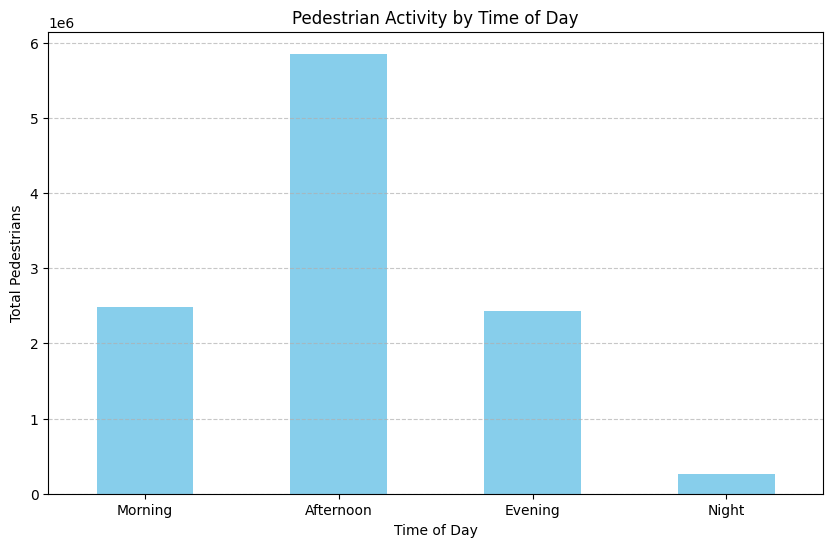

       hour_beginning Time_of_Day  Pedestrians
0 2019-04-30 00:00:00       Night            3
1 2019-12-31 22:00:00       Night           10
2 2019-12-31 23:00:00       Night            2
3 2019-12-31 21:00:00       Night           12
4 2019-04-01 03:00:00       Night            1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time_of_Day'] = df['hour_beginning'].dt.hour.apply(categorize_time)

activity_by_time_of_day = df.groupby('Time_of_Day')['Pedestrians'].sum()

plt.figure(figsize=(10, 6))
activity_by_time_of_day.reindex(['Morning', 'Afternoon', 'Evening', 'Night']).plot(kind='bar', color='skyblue')
plt.title("Pedestrian Activity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrians")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(df[['hour_beginning', 'Time_of_Day', 'Pedestrians']].head())
